# Task 1

## "Decision Trees for Regression Tasks"

**author:** "Gökberk Abdullah" 

**school number:** "090170341"

**date:** "May 29, 2023"

**Task 1:** Find a data set which is suitable for a regression task (you can use one of the data sets which you used in Homework I and there is no limit on the number of features or type of the features). Then, apply [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) and  [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) to this data set to find the best performing model with respect to **mean squared error** metric. Report the feature importance of best performing algorithm and comment on it.


#### Instructions to follow:

- Include all your codes here. Be sure that your code is CLEAN, READABLE, and REPRODUCIBLE.
- Put your data set into a **datasets** folder.
- Put your images (if available) into an **images** folder.
- Please return a NICE and CLEAR homework. Otherwise, it will not be graded.
- Please write YOUR OWN code. **DO NOT copy** my codes or someone else's codes.

## Data Decription

Concrete Compressive Strength dataset is used to show the relationship between various properties related to the components and processing conditions of concrete and its compressive strength. The dataset was prepared by researchers at the Istanbul Technical University and is available at the UCI Machine Learning Depository.

The dataset consists of 1030 concrete samples prepared using the vortex mixing method and contains 9 features/columns. These features are:

* cement: Cement (kg/m³)
* slag: Blast Furnace Slag (kg/m³)
* ash: Fly Ash (kg/m³)
* water: Water (kg/m³)
* superplastic: Superplasticizer (kg/m³)
* coarseagg: Coarse Aggregate (kg/m³)
* fineagg: Fine Aggregate (kg/m³)
* age: Age of concrete specimen in days (days)
* strength: Compressive Strength (MPa)

This dataset can be used in machine learning and data analysis applications. Specifically, regression models (linear, multiple, etc.) can be used to predict the compressive strength of concrete. The features in this dataset provide information about the components and processing conditions of concrete and are related to factors that affect its compressive strength. Therefore, this dataset can be used in many areas, such as quality control studies in the concrete industry and the development of new concrete mixtures.

You can find the source of the data on [this](https://www.kaggle.com/datasets/niteshyadav3103/concrete-compressive-strength) site. 

Let's import the necessary libraries:

In [1]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

Let's go to the datasets folder and read our data with the help of ```pandas``` library.

In [2]:
file_path = os.path.join("datasets", "concrete_data.csv")

df = pd.read_csv(file_path)
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


I use ```df.info()``` function for more details.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


There are no missing values ​​in our data.

In [4]:
df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

## Decision Tree Regressor Implementation

Let's divide our data into train and test. Since there is little data, it makes more sense to set the test portion as 10 percent.

In [6]:
X = df.drop(columns=["concrete_compressive_strength"], axis=1)
y = df['concrete_compressive_strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=55)

Next, let's create a pipeline combining standardization and decision tree regressor using the `make_pipeline()` function:

In [8]:
pipeline = make_pipeline(StandardScaler(), DecisionTreeRegressor())

Let's find the optimal parameter values ​​using the `GridSearchCV()` function. This function will try a number of different combinations of hyperparameter values ​​to determine the parameters that give the best performance.

In [9]:
hyperparameters = {
    'decisiontreeregressor__max_depth': [None, 5, 10, 15],
    'decisiontreeregressor__min_samples_split': [2, 5, 10],
    'decisiontreeregressor__min_samples_leaf': [1, 2, 4]
}

In [10]:
grid_search = GridSearchCV(pipeline, hyperparameters, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             param_grid={'decisiontreeregressor__max_depth': [None, 5, 10, 15],
                         'decisiontreeregressor__min_samples_leaf': [1, 2, 4],
                         'decisiontreeregressor__min_samples_split': [2, 5,
                                                                      10]},
             scoring='neg_mean_squared_error')

We can access the best parameter values ​​using `best_params_` and the best score using `best_score_`.

In [11]:
print("Best parameters: ", grid_search.best_params_)
print("Best score: {:.2f}".format(grid_search.best_score_))

Best parameters:  {'decisiontreeregressor__max_depth': 15, 'decisiontreeregressor__min_samples_leaf': 1, 'decisiontreeregressor__min_samples_split': 2}
Best score: -47.98


Let's apply the best parameters:

The `grid_search.best_score_` value is the best average accuracy value obtained during the cross-validation process. This value is obtained as a result of dividing the training data into different parts and training and validating the model sequentially on each part, and reflects the performance of the model in general.

When I investigated the reason why the `best_score_` value was negative, I discovered that `GridSearchCV` returned a value such as -47 as the best score, and this negative value actually represents good performance. A lower MSE value indicates better model performance. The fact that our MSE value was 48.79 for `X_test` at the bottom also confirmed this.

In [14]:
best_model = grid_search.best_estimator_

In [17]:
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

In [18]:
mse = mean_squared_error(y_test, y_pred)
mse_2 = mean_squared_error(y_train, y_pred_train)
print("MSE for test data: ", mse)
print("MSE for train data: ", mse_2)

MSE for test data:  48.79396476462305
MSE for train data:  1.3150209822605776


In [23]:
print('R2 Score for test data:',r2_score(y_test, y_pred))
print('R2 Score for train data:',r2_score(y_train, y_pred_train))

R2 Score for test data: 0.8301447871845566
R2 Score for train data: 0.9952630831622677


### Visualization

This code visualizes the decision tree using the `plot_tree` function after selecting the best model. I accessed the decision tree component of the best model with `best_model.named_steps['decisiontreeregressor']`. With `feature_names=X.columns` i give the feature names and with `filled=True` I have the nodes colored.

I displayed the visualized decision tree on the screen with `plt.show()`. I set the figure size with `plt.figure(figsize=(12, 8))`.


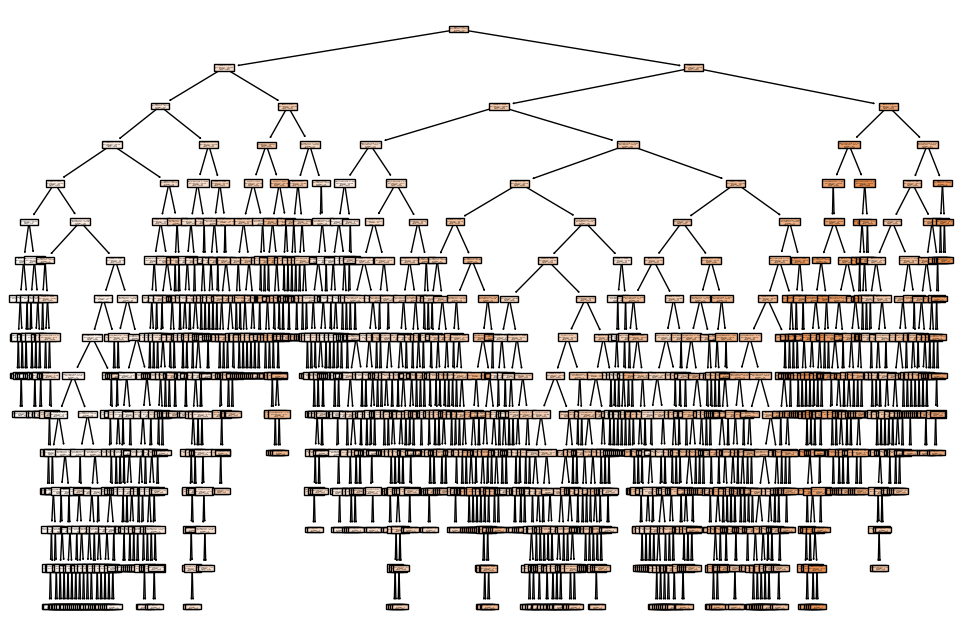

In [20]:
plt.figure(figsize=(12, 8))
plot_tree(best_model.named_steps['decisiontreeregressor'], feature_names=X.columns, filled=True)
plt.show()

MSE (mean squared error) is a metric that measures how far the predictions of a regression model are from the true values. The MSE score shows how close the estimates are to the true values. A lower MSE score indicates better model performance.

When we look at the results, the MSE score for the test dataset is 48.79, and for the training dataset it is 1.31. While the MSE score was lower in the training dataset, it was higher in the test dataset.

This may indicate that the model is overfitting the training dataset. That is, the model may have learned the training dataset very well, but its generalization ability may be low on the test dataset. We can also observe that there is overfitting in the R2 test data score.

## Random Forest Tree Regressor Implementation

Let's create a pipeline combining standardization and random forest regressor using the `make_pipeline()` function:

In [7]:
pipeline_2 = make_pipeline(StandardScaler(), RandomForestRegressor())

Let's find the optimal parameter values ​​using the `GridSearchCV()` function. This function will try a number of different combinations of hyperparameter values ​​to determine the parameters that give the best performance.

In [4]:
hyperparameters_2 = {
    'randomforestregressor__n_estimators': [100, 200, 300],
    'randomforestregressor__max_depth': [None, 5, 10, 15],
    'randomforestregressor__min_samples_split': [2, 5, 10],
    'randomforestregressor__min_samples_leaf': [1, 2, 4]
}

In [8]:
grid_search_2 = GridSearchCV(pipeline_2, hyperparameters_2, scoring='neg_mean_squared_error', cv=5)
grid_search_2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             param_grid={'randomforestregressor__max_depth': [None, 5, 10, 15],
                         'randomforestregressor__min_samples_leaf': [1, 2, 4],
                         'randomforestregressor__min_samples_split': [2, 5, 10],
                         'randomforestregressor__n_estimators': [100, 200,
                                                                 300]},
             scoring='neg_mean_squared_error')

We can access the best parameter values ​​using `best_params_` and the best score using `best_score_`.

In [9]:
print("Best parameters: ", grid_search_2.best_params_)
print("Best score: {:.2f}".format(grid_search_2.best_score_))

Best parameters:  {'randomforestregressor__max_depth': 15, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__n_estimators': 300}
Best score: -24.98


Let's apply the best parameters:

The `grid_search_2.best_score_` value is the best average accuracy value obtained during the cross-validation process. This value is obtained as a result of dividing the training data into different parts and training and validating the model sequentially on each part, and reflects the performance of the model in general.

I already mentioned above why the best_score_ value is negative.

In [10]:
best_model_2 = grid_search_2.best_estimator_

In [11]:
y_pred = best_model_2.predict(X_test)
y_pred_train = best_model_2.predict(X_train)

When we look at the values ​​that measure the model performance such as MSE and R square, we see that our model has learned the train dataset too well, so there is an overfitting situation.

In [12]:
mse = mean_squared_error(y_test, y_pred)
mse_2 = mean_squared_error(y_train, y_pred_train)
print("MSE for test data: ", mse)
print("MSE for train data: ", mse_2)

MSE for test data:  27.648341497810346
MSE for train data:  4.022434885042948


In [13]:
print('R2 Score for test data:',r2_score(y_test, y_pred))
print('R2 Score for train data:',r2_score(y_train, y_pred_train))

R2 Score for test data: 0.9037541845234616
R2 Score for train data: 0.9855105433352956


### Visualization

Random Forest is an ensemble learning algorithm that creates a bunch of different trees. When estimating, the given sample of each tree makes a prediction by consensus (mod) in the case of classification or mean in case of regression. This provides an overall more reliable and more stable forecast.

Therefore, the RandomForestRegressor model works by creating a bunch of different trees and as a result an ensemble. Each tree contributes to the model's predictions, resulting in a stronger model. At this point, I preferred to visualize only the first tree created to get a more organized view.

The expression `best_model_2.named_steps['randomforestregressor'].estimators_[0]` represents the first tree of your model used by RandomForestRegressor.

The `plot_tree` function is used to plot a tree. With the `feature_names` parameter, we get the names of the features used. The `filled=True` parameter allows tree nodes to be colored according to the classification or regression target.

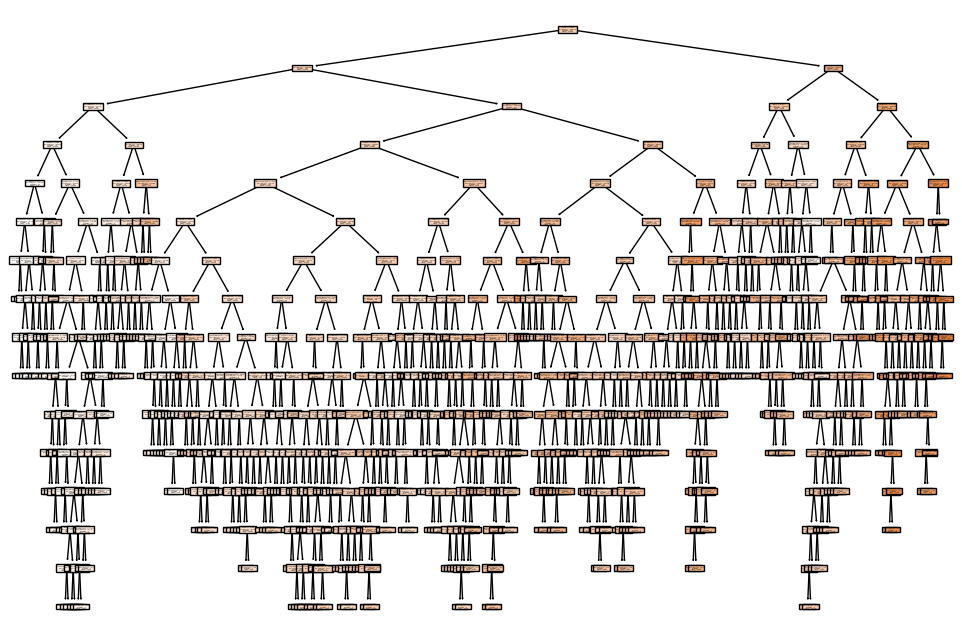

In [17]:
plt.figure(figsize=(12, 8))
plot_tree(best_model_2.named_steps['randomforestregressor'].estimators_[0], feature_names=X.columns, filled=True)
plt.show()

## Conclusion

The Decision Tree Regressor model produced an MSE score of 48.79 for the test set and an MSE score of 1.31 for the train set. This indicates that the model fits better on the train set but performs worse on the test set. Therefore, this model may be prone to overfitting.

The Random Forest Regressor model produced an MSE score of 27.64 for the test set and an MSE score of 4.02 for the train set. In this case, it is seen that the Random Forest model performs better. Lower MSE values ​​indicate that the model's predictions are closer to the true values. Also, the smaller difference between the MSE scores in the train and test sets of the Random Forest model indicates less tendency to overfit.

For these reasons, it may be more appropriate to choose the Random Forest Regressor model. Random Forest is a community model of multiple trees. Estimating each tree independently and combining the results provides a more powerful and generalizing model. Also, the Random Forest model has the ability to evaluate the importance of different features in the dataset.

The Random Forest provides "feature importance", a measure used to calculate feature importance. This measures the contribution of each feature to the model's performance. Significant features affect the model's predictions more and are therefore of higher importance. Feature importance ranking allows to understand which features have more weight based on the content and purpose of the dataset. 

For all these reasons, the algorithm we should choose should be Random Forest Regressor for the dataset we have.